<a href="https://colab.research.google.com/github/Saumya0330/Saumya-USC420/blob/main/Cog_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cognitive Assignment 8

1. Implement logistic regression on the Iris dataset.

In [2]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)


In [4]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class = 'ovr')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

#recall and precision--- true pos, false pos, true neg, false neg

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


array([0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



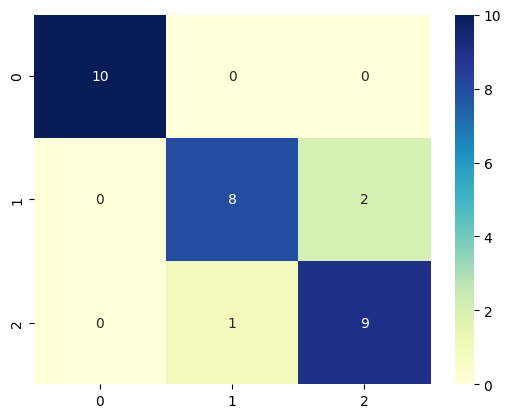

In [10]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Cnf_m = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(Cnf_m)
Cnf_m
sns.heatmap(pd.DataFrame(Cnf_m), annot=True, cmap="YlGnBu" ,fmt='g')
#fig, ax = plt.subplots()
#ax.xaxis.set_label_position("top")

#plt.tight_layout()
#plt.title('Confusion matrix', y=1.1)
#plt.ylabel('Actual label')
#plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred))